In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [59]:
def corrCalc(cov):
    corr = np.copy(cov)
    for i in range(len(cov[:,0])):
        for j in range(len(cov[:,0])):
            corr[i,j] = cov[i,j]/np.sqrt((cov[i,i]*cov[j,j]))
    return corr
def calculatecov(pknames, lists):
    pk = []
    for i in lists:
        pk.append(np.loadtxt(pknames.format(i),skiprows=1))
    pk=np.array(pk)
    cov = np.cov(pk[:,:,1].T, bias=True)
    mean = np.mean(pk[:,:,1],axis=0)
    fig=plt.figure(figsize=(7,3))
    plt.errorbar(pk[0,:,0], mean, yerr=np.sqrt(np.diag(cov))/np.sqrt(len(pk)))
    plt.xscale('log')
    plt.yscale('log')
    plt.title("power")
    plt.xlabel("k(h/Mpc)")
    plt.ylabel("PK")
    corr = corrCalc(cov)
    fig=plt.figure(figsize=(5,5))
    plt.imshow(corr, interpolation='nearest', cmap='RdYlBu',vmax=1,vmin=-1)
    plt.colorbar()
    return pk, mean, cov

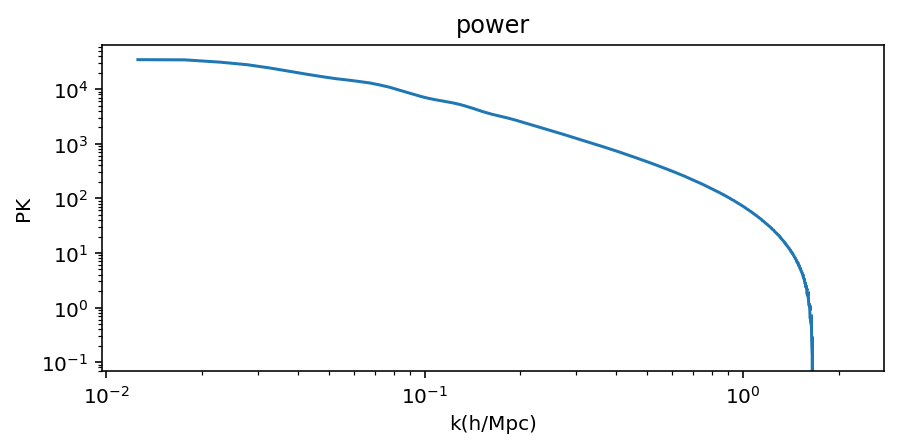

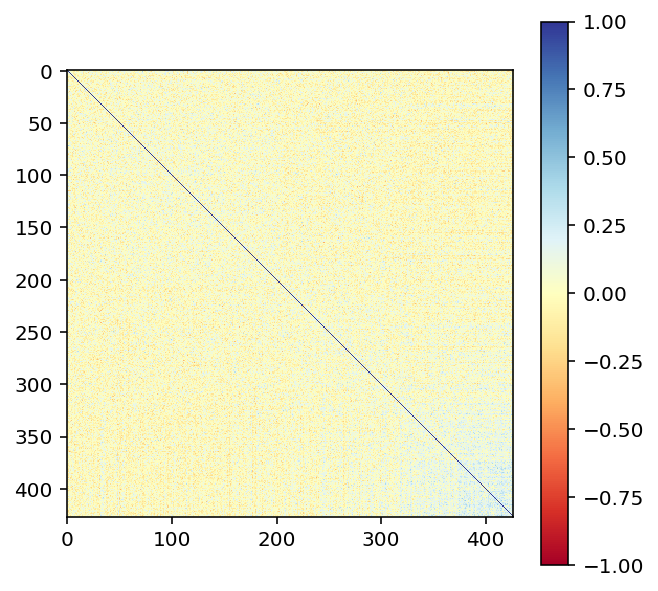

In [60]:
pknames = "../pair_simulation/pk_nbodykit_out/Pk_{0}.pk"
lists = np.arange(1,101)
pk,mean,cov = calculatecov(pknames, lists)

# Jackknife

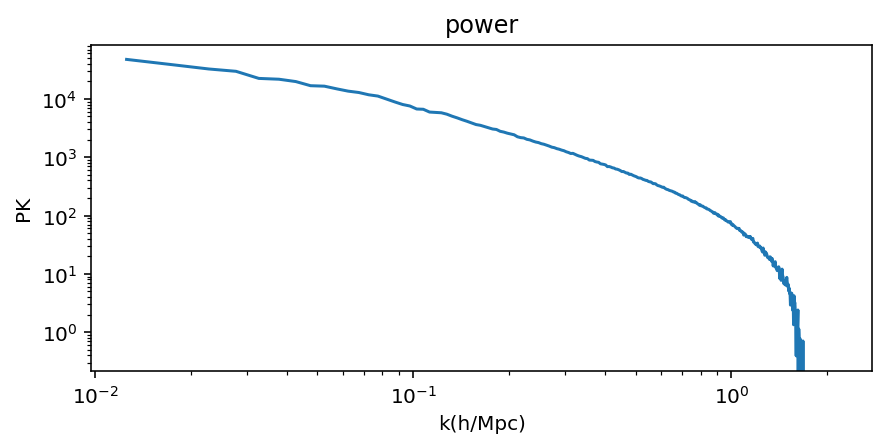

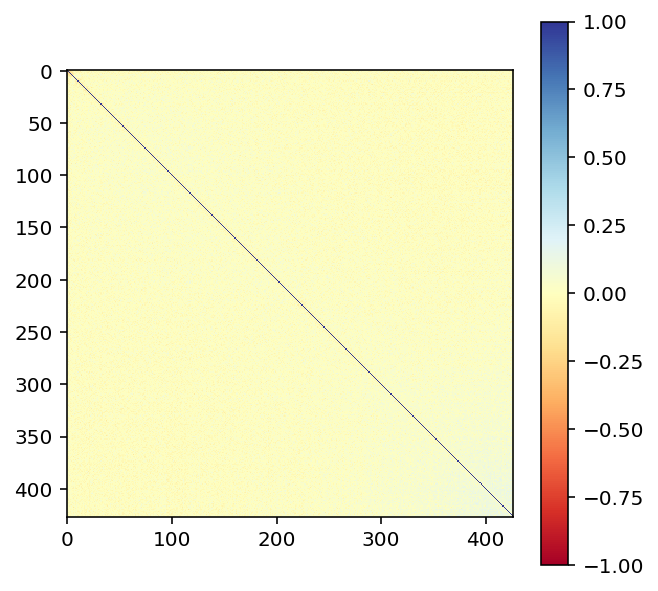

In [61]:
pkjknames = "../pair_simulation/pk_nbodykit_jack/Pk_jack{0}.pk"
lists = np.arange(0,1000)
pkjack,meanjack,covjack = calculatecov(pkjknames, lists)

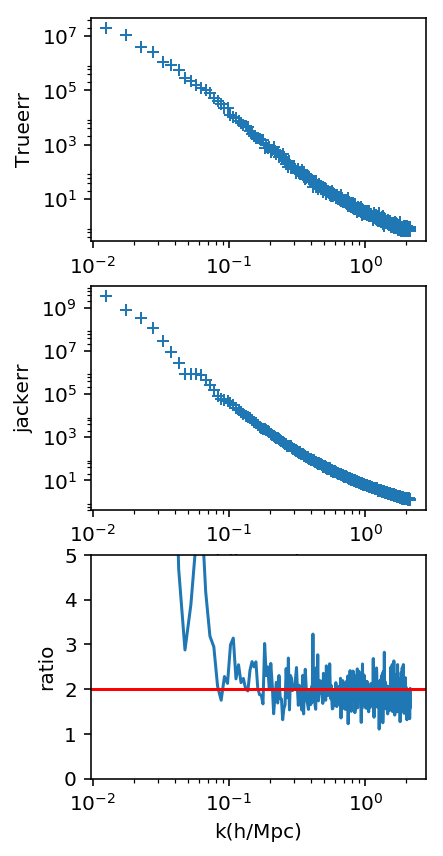

In [62]:
jackerrsq = np.diag(covjack)*999.
errsq = np.diag(cov)
fig = plt.figure(figsize=(3,7))
plt.subplot(311)
plt.plot(pkjack[0,:,0],errsq,"+")
plt.xlabel("k(h/Mpc)")
plt.ylabel("Trueerr")
plt.yscale('log')
plt.xscale('log')
plt.subplot(312)
plt.plot(pkjack[0,:,0],jackerrsq,"+")
plt.xlabel("k(h/Mpc)")
plt.ylabel("jackerr")
plt.yscale('log')
plt.xscale('log')
plt.subplot(313)
plt.plot(pkjack[0,:,0],(jackerrsq/errsq))
plt.ylim(-0,5)
plt.xlabel("k(h/Mpc)")
plt.ylabel("ratio")
plt.xscale('log')
plt.axhline(2,color="r")
#plt.yscale('log')

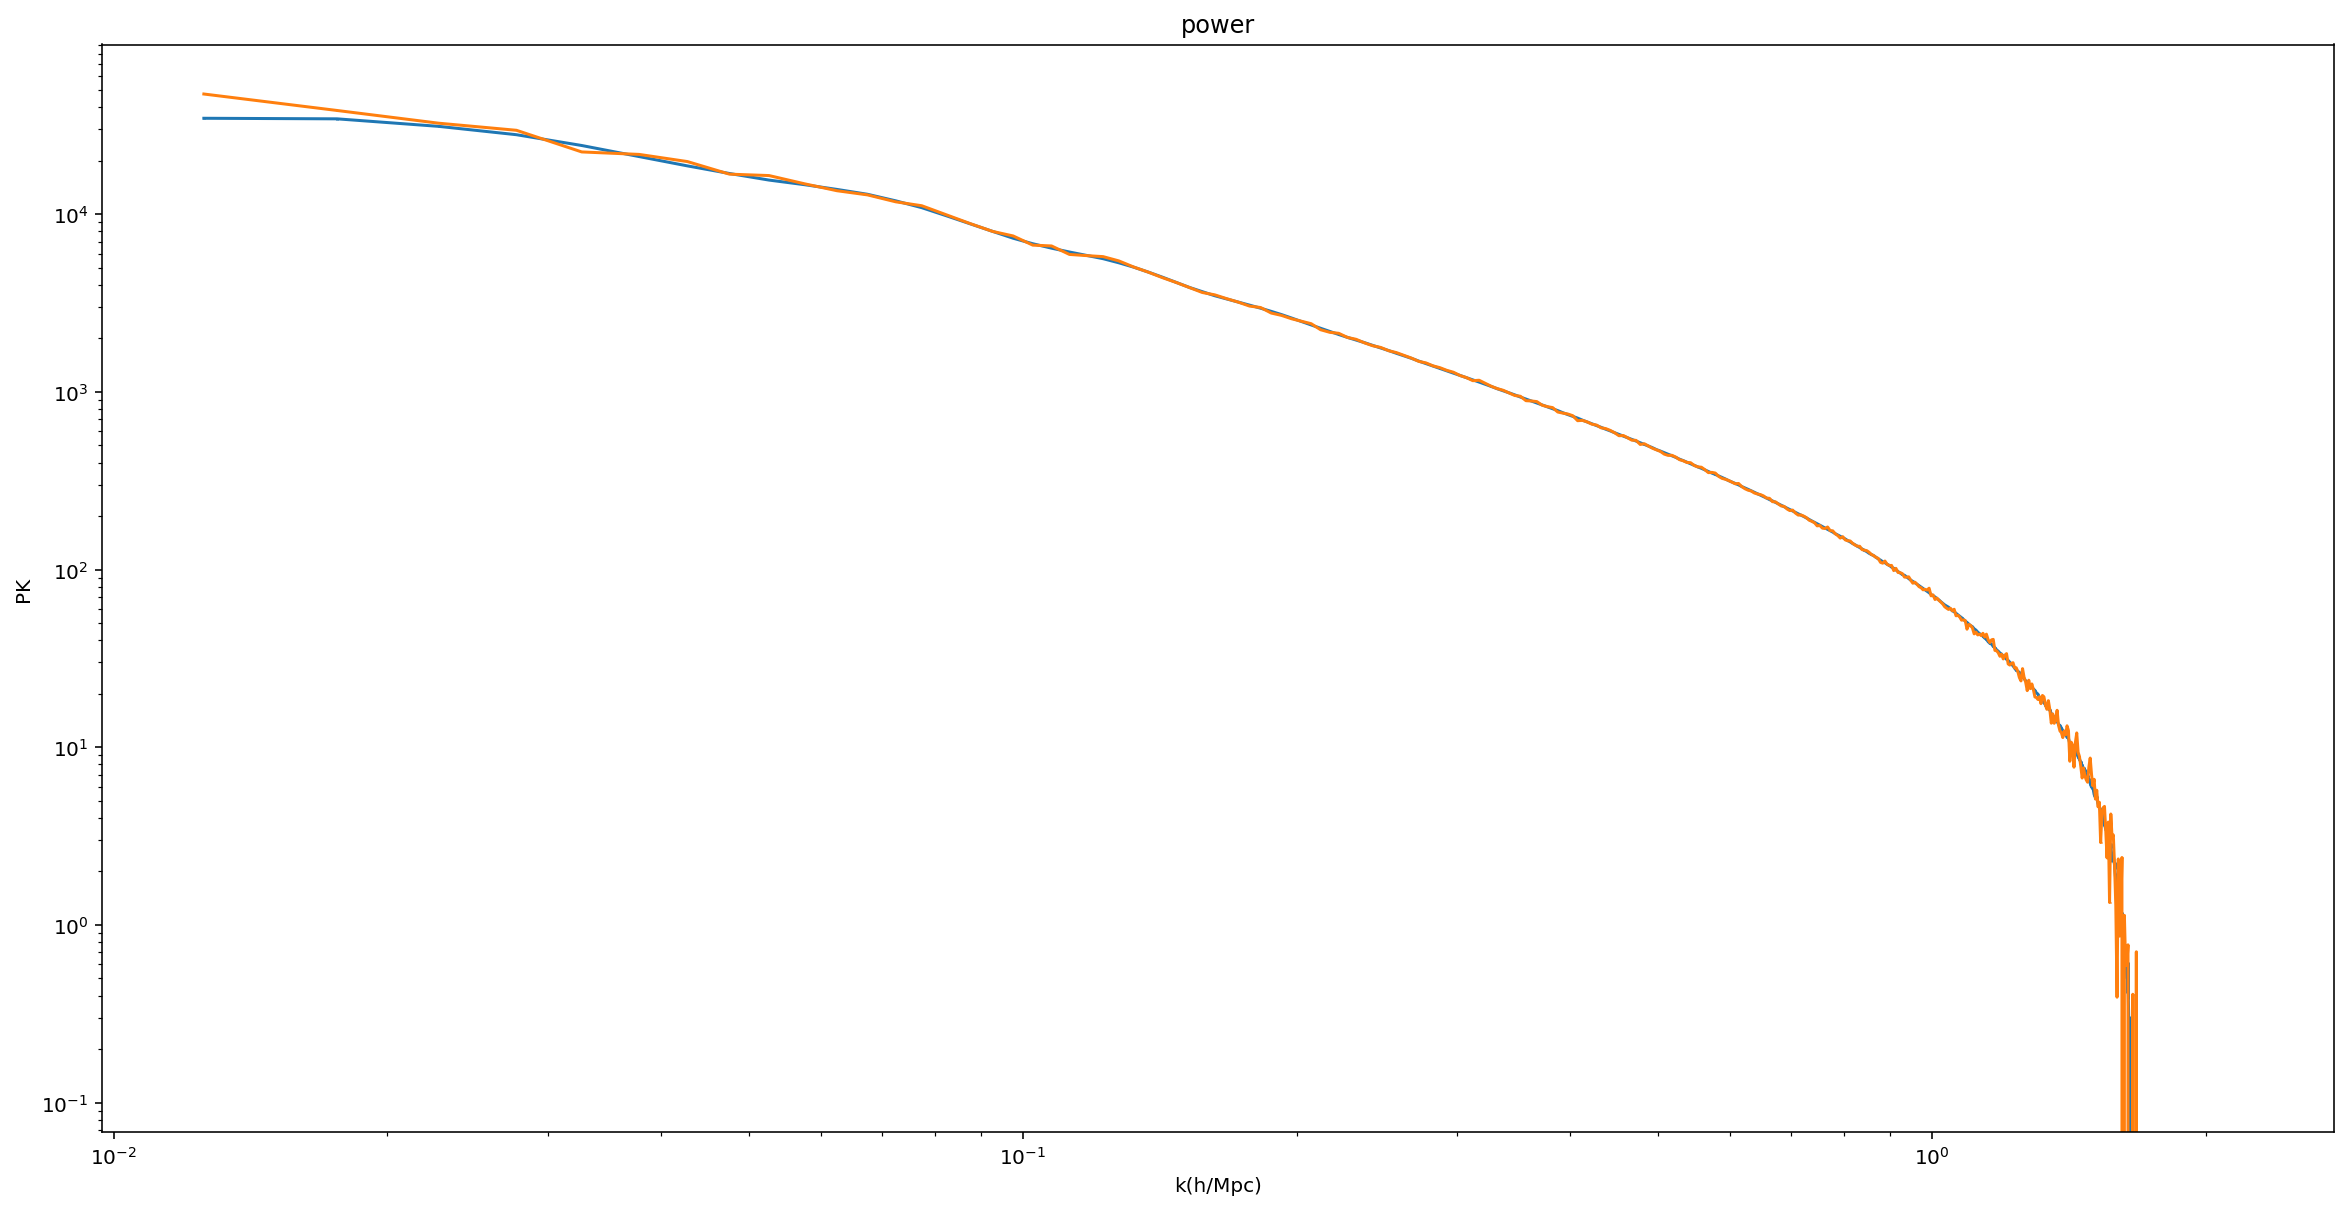

In [6]:
fig=plt.figure(figsize=(20,10))
plt.errorbar(pk[0,:,0], mean, yerr=np.sqrt(np.diag(cov))/np.sqrt(len(pk)))
plt.errorbar(pkjack[0,:,0], meanjack, yerr=np.sqrt(np.diag(covjack))/np.sqrt(len(pkjack)))
plt.xscale('log')
plt.yscale('log')
plt.title("power")
plt.xlabel("k(h/Mpc)")
plt.ylabel("PK")

In [55]:
pkjknames = "../pair_simulation/number_jack/Pk_jack{0}.pk"
lists = np.arange(0,300)
pk = []
for i in lists:
        pk.append(np.loadtxt(pkjknames.format(i),skiprows=1))
pk=np.array(pk)

(3138989.8100000001, 3139022.835)


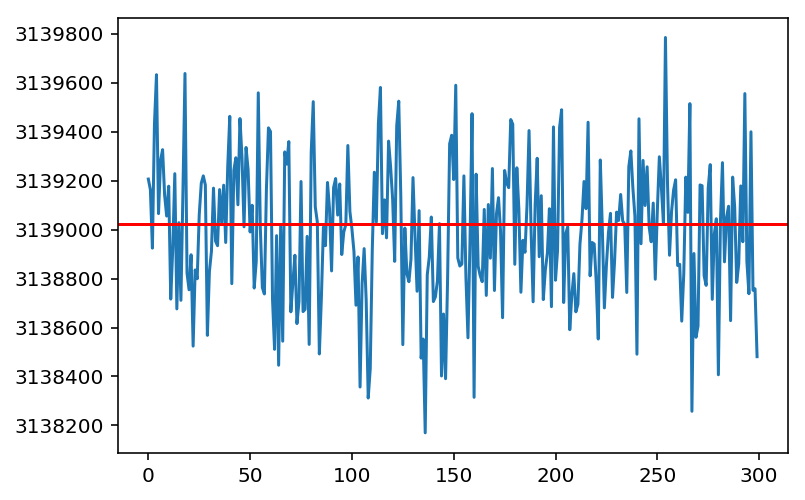

In [56]:
plt.plot(pk)
expectednumber = 3142165*999/1000.
print(np.mean(pk),3142165*999/1000.)
plt.axhline(expectednumber,color="r")